# **Маркетинговый анализ эффективности работы приложения Procrastinate Pro+** #

**Цель исследования** — выявить причины неокупаемости пользователей приложения Procrastinate Pro+ и разработать рекомендации для отдела маркетинга по повышению качества пользователей приложения.
<br>

В ходе анализа будут проанализированы следующие данные о пользователях, привлечённых с *1 мая по 27 октября 2019 года*:
-	лог сервера с данными об их посещениях;
-	выгрузка их покупок за этот период;
-	рекламные расходы.
<br>

*Задачи исследования* выявить:
-	откуда приходят пользователи и какими устройствами они пользуются;
-	сколько стоит привлечение пользователей из различных рекламных каналов;
-	сколько денег приносит каждый клиент;
-	когда расходы на привлечение клиента окупаются;
-	какие факторы мешают привлечению клиентов.
<br>

*Ход исследования*:
- предисследовательский анализ (обработка пропусков, дубликатов, типов данных и т.п.);
- расчёт и анализа метрик (LTV, ROI, удержание и конверсия);
- исследовательский анализ данных (составление профилей пользователей по странам и устройствам и т.д.);
- исследование маркетинговых затрат;
- оценка окупаемости рекламы;
- формулирование общих выводов.

## **Предисследовательский анализ** ##

In [3]:
# загрузим данные и библиотеки, которые понадобятся для анализа, проведем общий анализ данных, применив методы head(), info()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [4]:
try:
    path='/Users/Рафаэль/Desktop/Общий архив/product_analist/'
    costs = pd.read_csv(path+'costs_info_short.csv')
except:
    costs = pd.read_csv('/datasets/costs_info_short.csv')

display(costs.head(5))
costs.info()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [5]:
try:
    path='/Users/Рафаэль/Desktop/Общий архив/product_analist/'
    orders = pd.read_csv(path+'orders_info_short.csv')
except:
    orders = pd.read_csv('/datasets/orders_info_short.csv')

display(orders.head(5))
orders.info()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
try:
    path='/Users/Рафаэль/Desktop/Общий архив/product_analist/'
    visits = pd.read_csv(path+'visits_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')

display(visits.head(5))
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [7]:
# проверим таблицы на явные дубликаты 
print(costs.duplicated().sum())
print(orders.duplicated().sum())
visits.duplicated().sum()

0
0


0

Общий анализ данных показал, что в таблицах отсутствуют пропущенные значения и дубликаты и во всех таблицах необходимо привести названия колонок в должный стилевой вид ("змеиный реестр", строчные буквы).

В базе данных с затратами на рекламу (costs) столбец с датой dt необходимо привести к типу данных "дата".

В базе данных с покупками (orders) столбец с датой Event Dt необходимо привести к числовому типу данных, а столбец User Id - к целым числам.

В базе данных с покупками (visits) столбцы с датой Session Start и Session End необходимо привести к числовому типу данных, а столбец User Id - к целым числам.

In [8]:
# переименуем столбцы, сначала приведем их r строчным буквам, затем поставим "змеииный" регистр
costs.columns = costs.columns.str.lower()
orders.columns = orders.columns.str.lower()
visits.columns = visits.columns.str.lower()

In [9]:
visits.columns = [x.replace(' ', '_') for x in visits.columns]
orders.columns = [x.replace(' ', '_') for x in orders.columns]

In [10]:
# проверяем изменения в названиях столбцов
costs.info()
orders.info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  objec

In [11]:
# меняем типы данных в столбцах
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
visits['user_id'] = visits['user_id'].astype('int')
orders['user_id'] = orders['user_id'].astype('int')

In [12]:
# проверяем изменения в типах данных
costs.info()
orders.info()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int32         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 785.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 n

Согласно анализу, представленные данные достаточно качественные, в них отсутствуют пропущенные значения и дубликаты.

## **Функции для расчёта и анализа LTV, ROI, удержания и конверсии** ##

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [13]:
# функция для создания пользовательских профилей

def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
profiles = get_profiles(visits, orders, costs)

In [14]:
print(profiles.head(10))

      user_id            first_ts         channel   device         region  \
0 -2147409877 2019-06-16 08:42:58         organic       PC             UK   
1 -2147375740 2019-05-29 20:03:52        FaceBoom  Android  United States   
2 -2147362870 2019-08-15 01:45:41         organic   iPhone  United States   
3 -2147310616 2019-08-12 10:58:20         organic      Mac  United States   
4 -2147294564 2019-05-25 13:25:52  RocketSuperAds   iPhone  United States   
5 -2147273579 2019-08-20 02:31:25          TipTop   iPhone  United States   
6 -2147241204 2019-06-09 07:02:20         LeapBob      Mac         France   
7 -2147211470 2019-06-27 12:00:46    MediaTornado      Mac  United States   
8 -2147189619 2019-05-26 00:04:49         organic   iPhone  United States   
9 -2147186535 2019-05-13 10:04:40         organic  Android  United States   

           dt      month  payer  acquisition_cost  
0  2019-06-16 2019-06-01   True          0.000000  
1  2019-05-29 2019-05-01  False          1.11447

In [15]:
# функция для расчёта удержания

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

     # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [18]:
# построим функции для визуализации изучаемых метрик
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [19]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Были созданы функции для создания профилей и подсчета следующих метрик: Retention Rate (коэффициент удержания), Conversion Rate (коэффциент конверсии), LTV (Lifetime Value, пожизненная ценность, то есть прибыль, которую приносит один клиент), ROI (Return On Investment, окупаемость инвестиций). Также были построены функции визуализации (построения графиков) выше указанных метрик.

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

*Профили пользователей, минимальная и максимальная даты привлечения пользователей*

In [22]:
# профили пользователей были созданы ранее, расчитаем минимальную дату привлечения пользователей
min_analysis_date = costs['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

In [23]:
# профили пользователей были созданы ранее, расчитаем максимальную дату привлечения пользователей
max_analysis_date = costs['dt'].max()
max_analysis_date

datetime.date(2019, 10, 27)

Минимальнаяя дата привлечения пользователей 1 мая, максимальная - 27 октября 2019 года.

*Пользователи приложения по странам*

In [24]:
# сгруппируем профили по регионам и платящим пользователям с указанием функций суммы и средней
countries= round(profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum','mean']})*100,1)
countries.columns=['id_count', 'payer_count', 'share']
countries

,id_count,payer_count,share
region,,,
France,1745000,66300,3.8
Germany,1498000,61600,4.1
UK,1757500,70000,4.0
United States,10000200,690200,6.9


Самое большое количество пользователей приходят из США (порядка 100 тыс., что значительно больше, чем в остальных странах, где число пользователей варируется примерно от 15 до 18 тыс.) Доля платящих также выше всего в США и составляет 7%, тогда как в Германии, Великобритании и Франции их доля равна около 4%).

*Платящие пользователи и их устройства*

In [25]:
# сгруппируем профили по устройствам и платящим пользователям с указанием функции суммы 
devices = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
# вычислим долю платящих для каждого устройства, значения округлим до 3 цифр после запятой с помощью round()
devices['share'] = round(devices['payer'] / devices['user_id']*100, 1)
devices

,user_id,payer,share
device,,,
iPhone,54479,3382,6.2
Android,35031,2050,5.9
Mac,30042,1912,6.4
PC,30455,1537,5.0


Клиенты приложения предпочитают пользоваться Iphone, остальные типы устройств имеют примерно одинаковое количество пользователей (примерно по 20 тыс.). Среди платящих клентов по численности также лидирует Iphone, однако его доля среди платящих примерно равна 9%, как и у Mac, чуть меньше доля у Android - 8% и PC - 7%. 

*Рекламные источники привлечения пользователей*

In [26]:
# сгруппируем профили по каналам и платящим пользователям с указанием функции суммы 
channels = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
channels['share'] = round(channels['payer'] / channels['user_id']*100, 1)
channels

,user_id,payer,share
channel,,,
FaceBoom,29144,3557,12.2
TipTop,19561,1878,9.6
organic,56439,1160,2.1
WahooNetBanner,8552,453,5.3
AdNonSense,3880,440,11.3
RocketSuperAds,4448,352,7.9
LeapBob,8553,262,3.1
OppleCreativeMedia,8605,233,2.7
lambdaMediaAds,2149,225,10.5


Самое большое количество пользователей (около 56 тыс.) являются "органическими", то есть они стали пользователями приложения без какой-либо рекламы. Среди рекламных каналов лидерами по привлечению пользователей являются FaceBoom (29 тыс.) и Tip Top (19,5 тыс.), наименее эффективным каналом привлечения является lambdaMediaAds (2 тыс.). 
<br>

Однако, среди платящих пользователей большинство было привлечено рекламой, а именно каналом FaceBoom (12%),AdNonSense (11%)б lambdaMediaAds (11%) и Tip Top (10%). Вместе с тем, доля "органических" пользователей среди платящих достигла лишь 2%. Следует отметить, что канал lambdaMediaAds несмотря на самое маленькое число, привлеченных пользователей, входят в лидеры по доле платящих пользователей, что говорит о высокой эффективности рекламы на данном рекламе. Таким образом, можно сделать вывод, что "органические" пользователи не достаточно активно становятся платящими.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

*Общая сумма расходов на маркетинг*

In [27]:
# рассчитаем общую ссумму расходов на маркетинг
costs['costs'].sum().round()

105497.0

Общая сумма расходов на маркетинг равна 105,5 тыс.

*Траты по рекламным источникам*

In [28]:
# рассчитаем траты на каждый источник
channel_costs = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
round(channel_costs)

,costs
channel,
TipTop,54751.0
FaceBoom,32446.0
WahooNetBanner,5151.0
AdNonSense,3911.0
OppleCreativeMedia,2151.0
RocketSuperAds,1833.0
LeapBob,1798.0
lambdaMediaAds,1558.0
MediaTornado,954.0


Самое большое количество денег было потрачено на следующие рекламные каналы: Tip Top (54 751) и FaceBoom (32 446). На остальные источники было затрачено значительно меньше денег - менее 5 тыс. Самые низкие затраты у таких каналов, как MediaTornado и YRabbit (примерно 950 тыс.).

*График динамики изменения расходов во времени по каждому источнику*

In [29]:
# создадим столбец по месяцам и неделям 
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

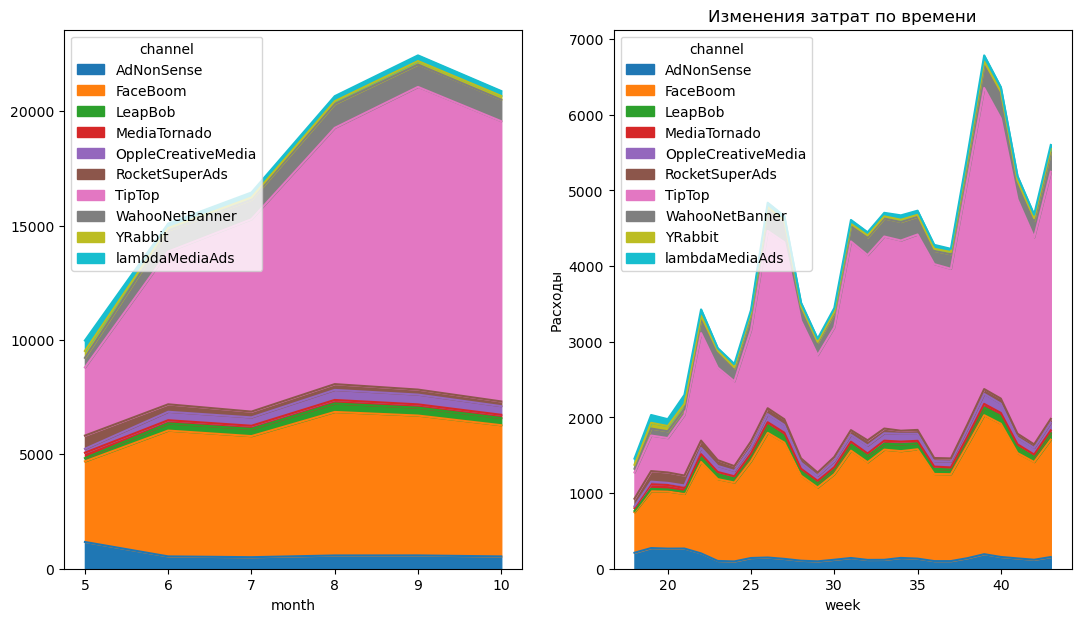

In [30]:
dates = [costs['month'], costs['week']]
plt.subplots(figsize = (13,7))
for i, part in enumerate(dates):
    costs.pivot_table(index=part,columns='channel', values='costs', aggfunc='sum'
    ).plot.area(ax = plt.subplot(1, 2, i + 1))
plt.title('Изменения затрат по времени')
plt.ylabel('Расходы')
plt.show()

В динамике по *месяцам* можно сделать следующие выводы:
- в целом траты по месяцам растут практически по всем каналам
- особенно значительный рост наблюдается у Tip Top (с 3 тыс по 12 тыс.)
- у FaceBoom затраты также растут (с 3.5. тыс по 56 тыс.), но последние два месяца затраты на рекламу начали медленно снижаться.
<br>

В динамике по *неделям* (с 18 по 43 неделю) наблюдаются следующие тенденции:
- у Tip Top значительный рост произошел на 21 (практически в 2 раза) и 26 неделях (с 1474 по 2343), снижение затрат было на 23 и более существенное - на 500 тыс. - на 28 неделе; в целом же для этого канала преимущественно характерна положительная динамика затрат
- У FaceBoom нестабильный рост затрат на рекламу, попеременно происходит рост и незначительное снижение, вместе с тем, наибольший рост был на 22 (на 500 тыс.) и 26 неделях (на 400 тыс).

*Стоимость привлечения одного покупателя из каждого источника в среднем*

In [31]:
# добавляем параметр ad_costs — траты на рекламу
def get_profiles(visits, orders, events, ad_costs, event_names=[]):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь
            # среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

round(profiles.groupby('channel').agg({'acquisition_cost': 'mean'}),2)



,acquisition_cost
channel,
AdNonSense,1.01
FaceBoom,1.11
LeapBob,0.21
MediaTornado,0.22
OppleCreativeMedia,0.25
RocketSuperAds,0.41
TipTop,2.80
WahooNetBanner,0.60
YRabbit,0.22


In [32]:
# посчитаем средние расходы по проекту
round(profiles.acquisition_cost.mean(),1)

0.7

Привлечение одного пользователя из рекламной сети TipTop обошлось компании в среднем в 2,8 , таким образом пользователи из данного канала, являются самыми дорогими для компании. Пользователи с канала FaceBoom и AdNonSense примерно в 2 раза дешевле  - примерно по 1. Далее по стоимости потребителя можно выделить lambdaMediaAds (0.7) и WahooNetBanner	(0,6). По остальнм каналам затраты на одного пользователя меньше 0,41. Также следует отметить, что стоимость привлечения органических пользователей по каналам равна нулю, потому что они не были привлечены за счет рекламы. Вцелом же средний CAC по проекту небольшой - 1,1.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [33]:
# необходимо исключить органических пользователей 
profiles = profiles.query('channel != "organic"')

In [34]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

*Окупаемость рекламы (LTV, ROI, CAC)*

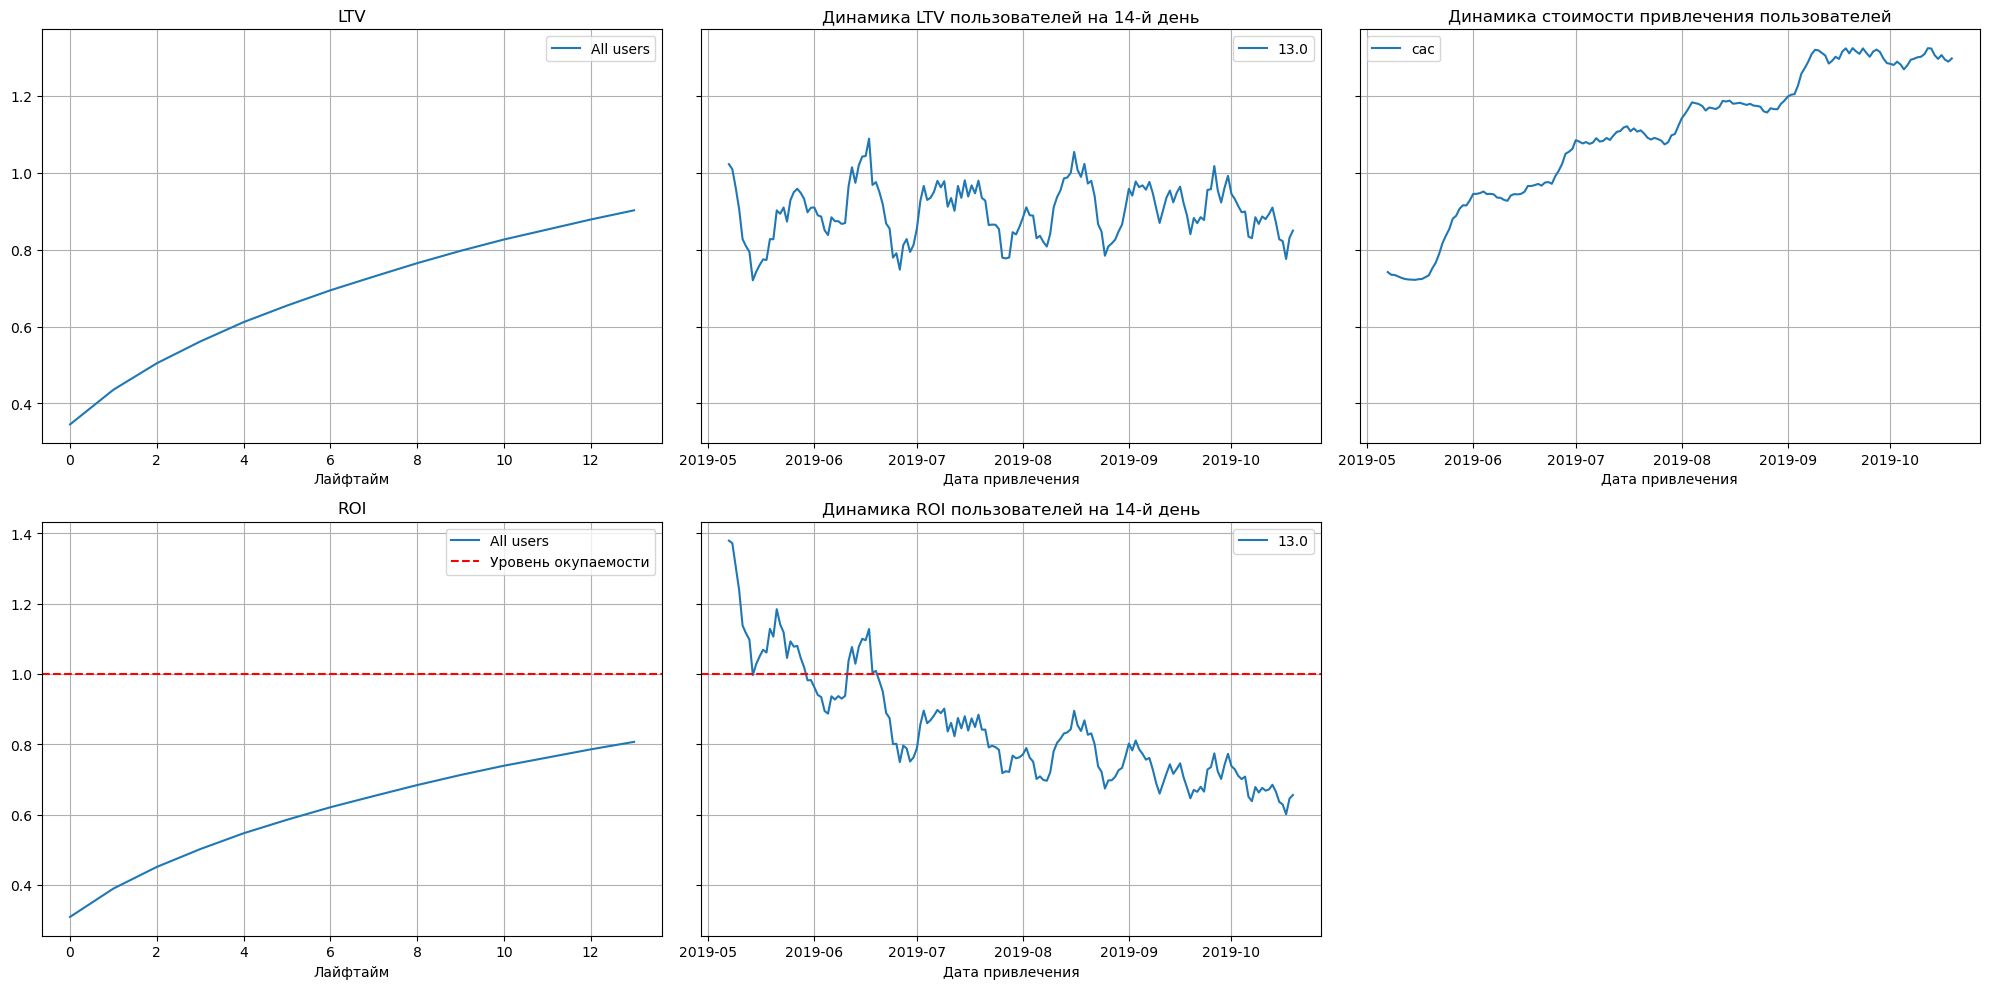

In [35]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Общий показатель ценности одного пользователя (LTV) стабильно растет,то есть данная метрика верно рассчитана и,значит, проблема не в ухудшении качества пользователей. 

<br>
Согласно динамике LTV на 14-й день, самая большая "пожизненная ценность" клиента была у пользователей, привлеченных в июне и самая низкая в мае 2019 г., что (вероятно, связано, с тем, что с июня начала активно действовать реклама по привлечению новых пользователей).
<br>

Динамика стоимости привлечения пользователей постепенно растет, значительноу увеличение CAC наблюдается в июне.
<br>

По графикам метрики ROI, реклама не окупается, но к концу второй недели ROI приблизилось к уровню окупаемости (80%). График динамики ROI на 14-й день показывает, что пользователи перестали окупаться в июле.

*Конверсия и удержание пользователей*

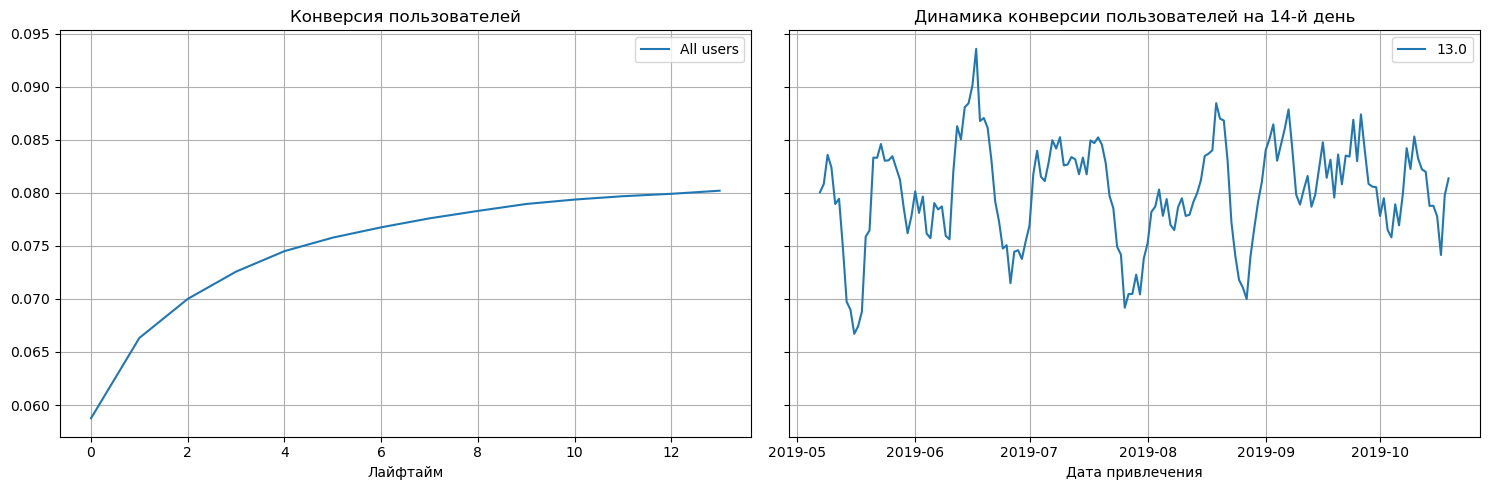

In [36]:
# строим графики по конверсии пользователей и динамике ее изменения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Согласно графику конверсия пользователей растет, что говорит о верности построения графика. Наибольшая конверсия наблюдается у пользователей, привлеченных в июне и наименьшая - в мае.

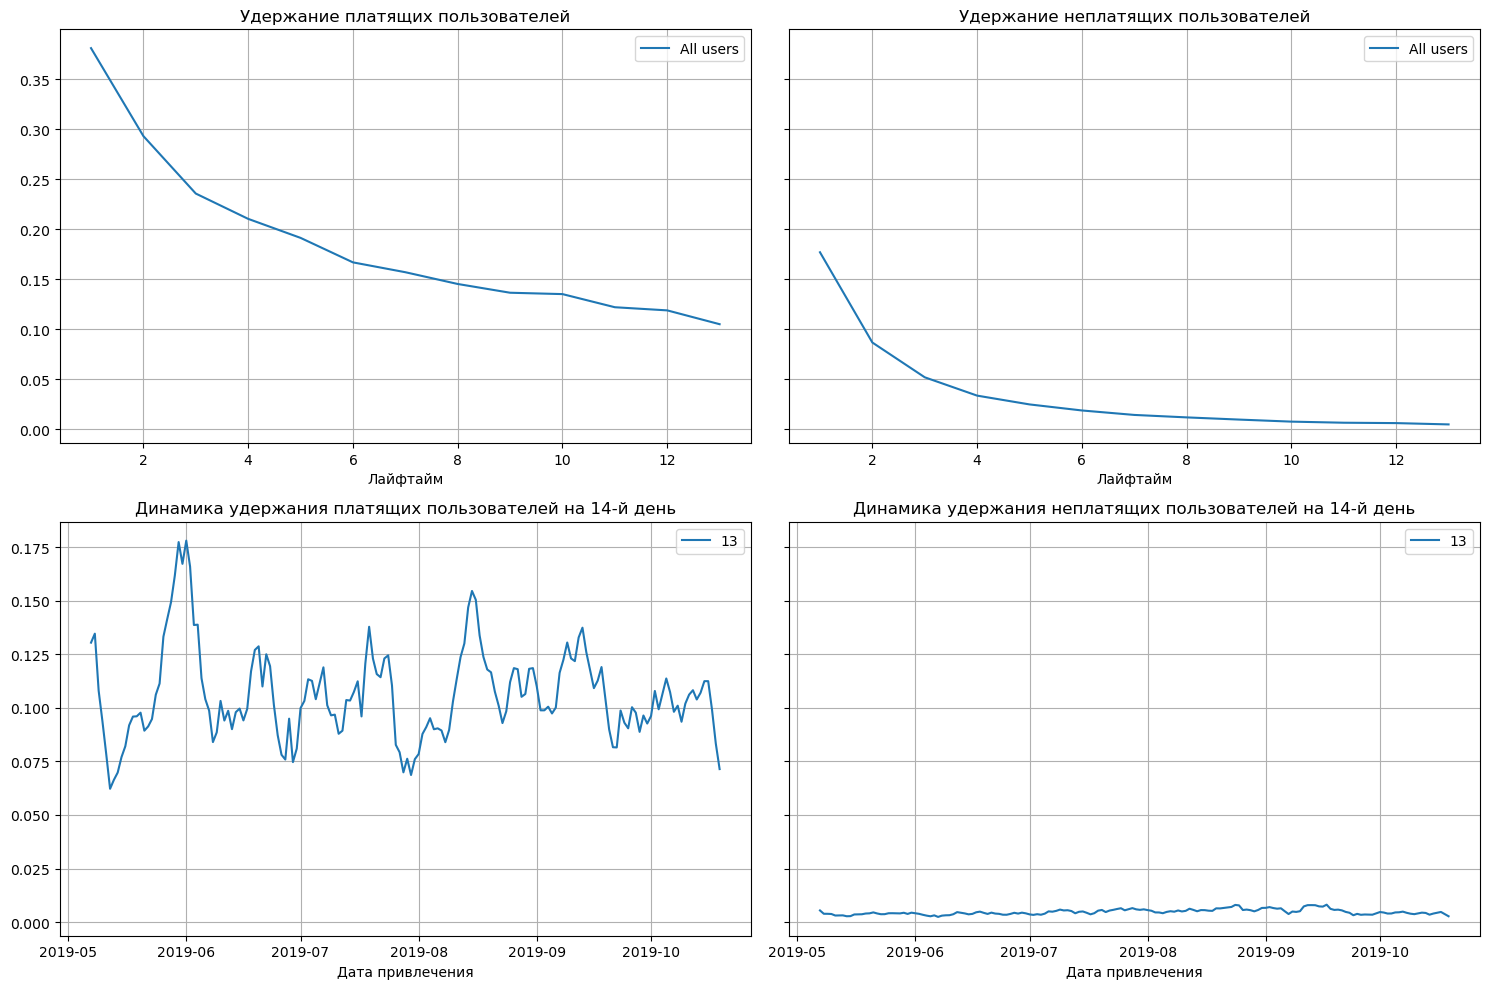

In [37]:
# строим графики по удержанию пользователей и динамике его изменения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Показатель удержания падает для всех когорт, как для платящих, так и неплатящих, вместе с тем, платящие клиенты удерживаются примерно на 20% лучше. На конец второй недели удержание платящих варьируется примерно с 6% по 18%, тогда как среди неплатящих пользователей наблюдается стабильно низкое удержание (примерно менее 2%).

*Окупаемость рекламы с разбивкой по устройствам*

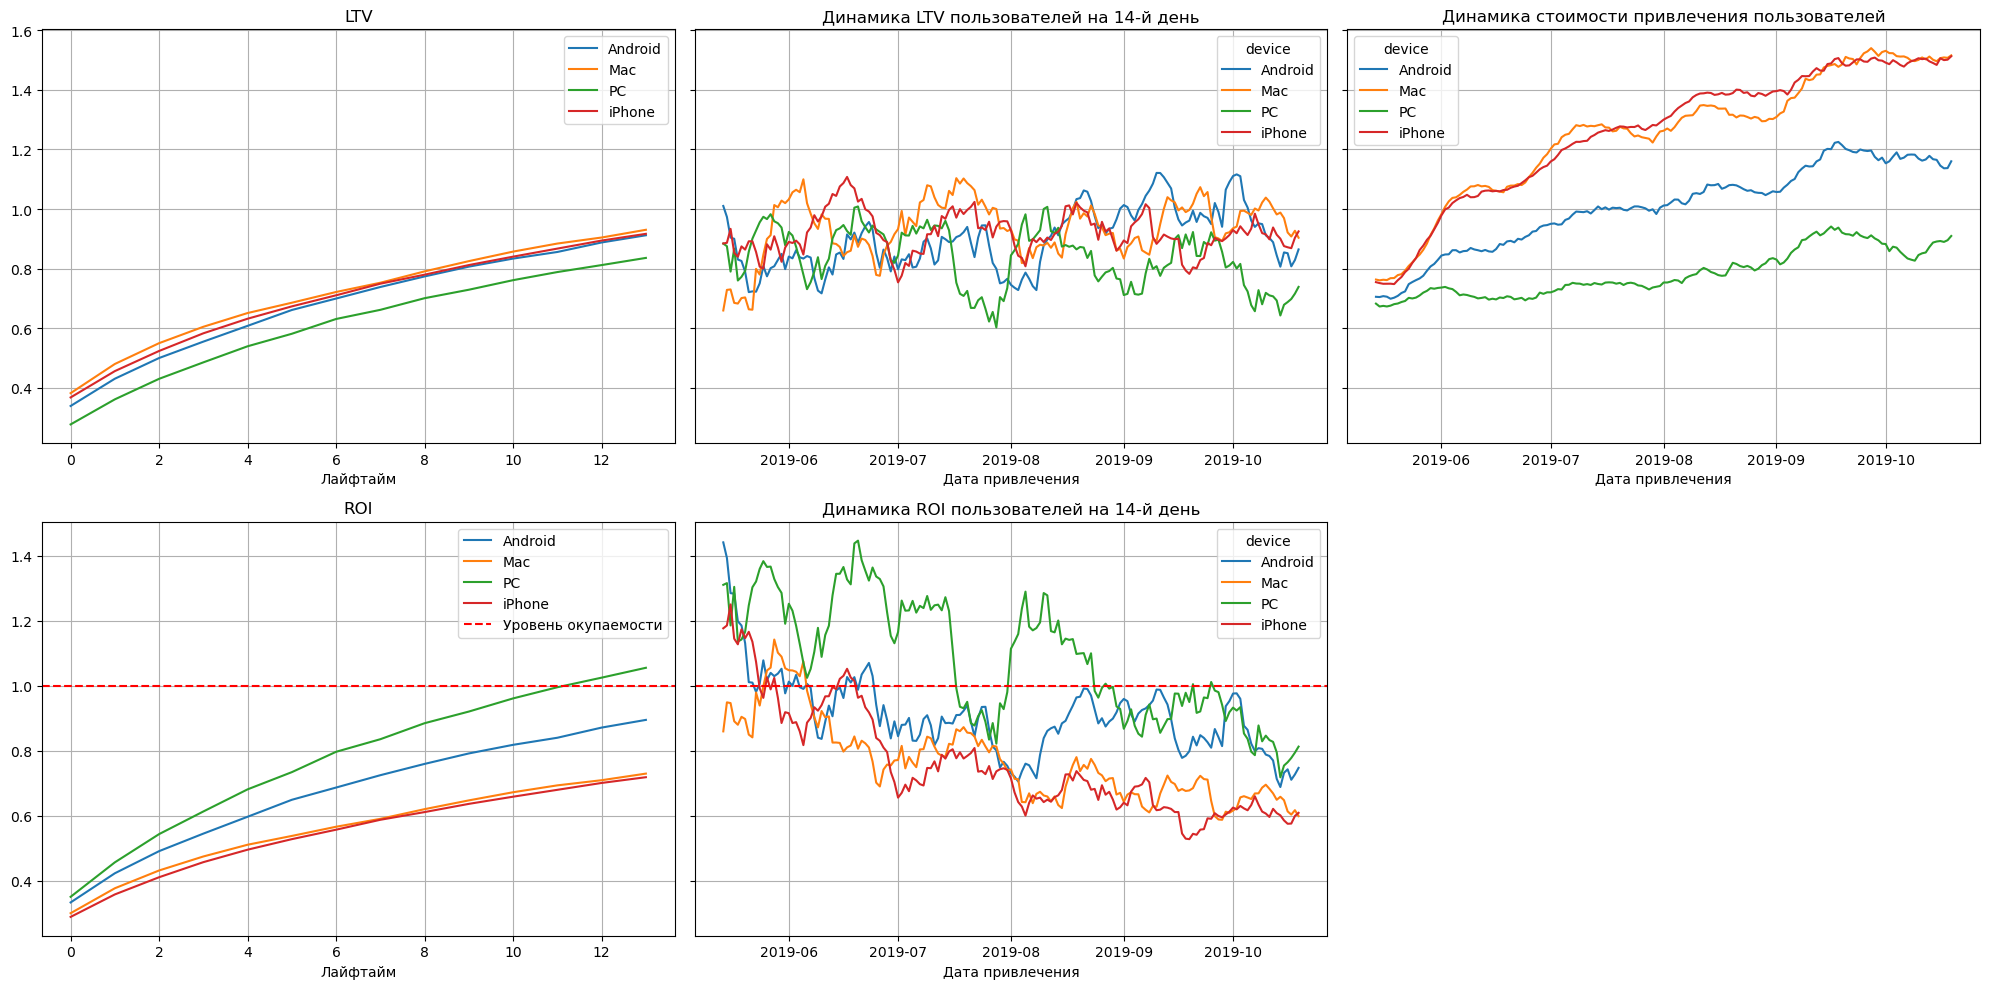

In [38]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Меньше всего денег компании приносят пользователи PC, все остальные PC имеют примерно одинаковый LTV. Динамика LTV на конец второй недели по устройствам схожа с дианимикой по общему LTV: в июне наблюдается наибольшее количество покупок пользователей, в мае - наименьшее. Летом пользователи Iphone показали большую "пожизненную ценность", а осенью - Mac и Android.

<br>
Что касается стоимости привлечения пользователей, большее количество денег было потрачено на привлечение пользователей таких устройств, как Mac и Iphone, меньше всего на - PC. 
<br>

Интересно, что по показателю ROI пользователи Iphone и Mac (несмотря на большие траты компании, не окупились (примерно 90%)), а также Android, тогда как пользователи PC с 11 дня начали окупаться.  Вместе с тем, динамика ROI на 14 день показала, что пользователи Mac, Iphone, Android окупались с мая до середины июня, а PC имел наибольшую окупаемость летом. Кроме того, окупаемость на конец второй недели имеют общую тенденцию снижения с мая по октябрь по всем устройствам.

*Окупаемость рекламы с разбивкой по странам*

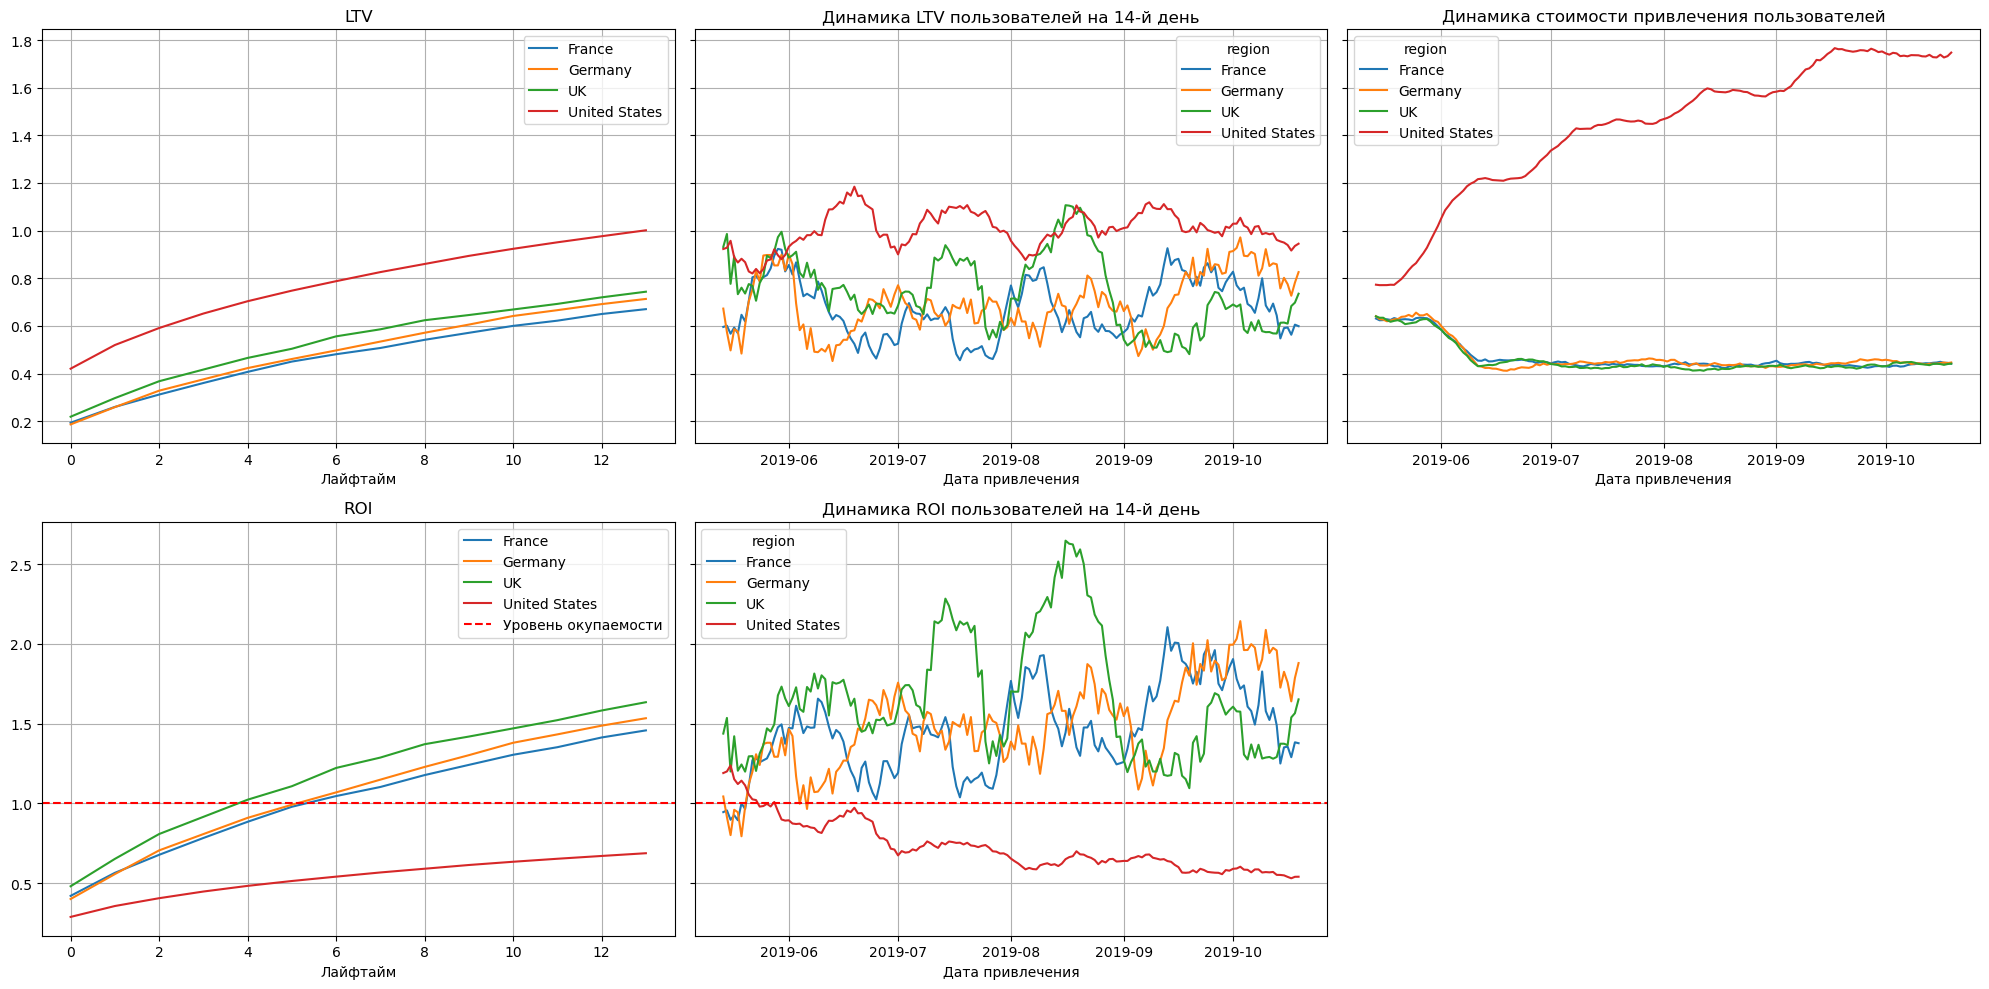

In [39]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Согласно LTV, cамые качественные пользователи приложения приходят из США, затраты на привлечение, которых значимо больше по сравнению с остальными странами. Меньше всего качественных пользователей - из Франции. Динамика LTV к концу второй недели показывает, что высокие доходы от одного пользователя летом были также у пользователей из Великобритании и Германии, а также в октябре - из Германии. 
<br>

Вместе с тем, покупатели из всех стран (в большей степени Великобритания), кроме США - окупаются, что вероятно, связано со слишком большими рекламными затратами на пользователей из этой страны. По динамике окупаемости на 14-й день, пользователи из США окупались примерно до июня месяца, тогда как пользователи из остальных стран окупались в течение всего периода, и в большей степени окупались пользователи из Великобритании с июля по август. Можно порекомендовать маркетологам снизить расходы по привлечению ппользователей из США.

*Окупаемость рекламы с разбивкой по рекламным каналам*

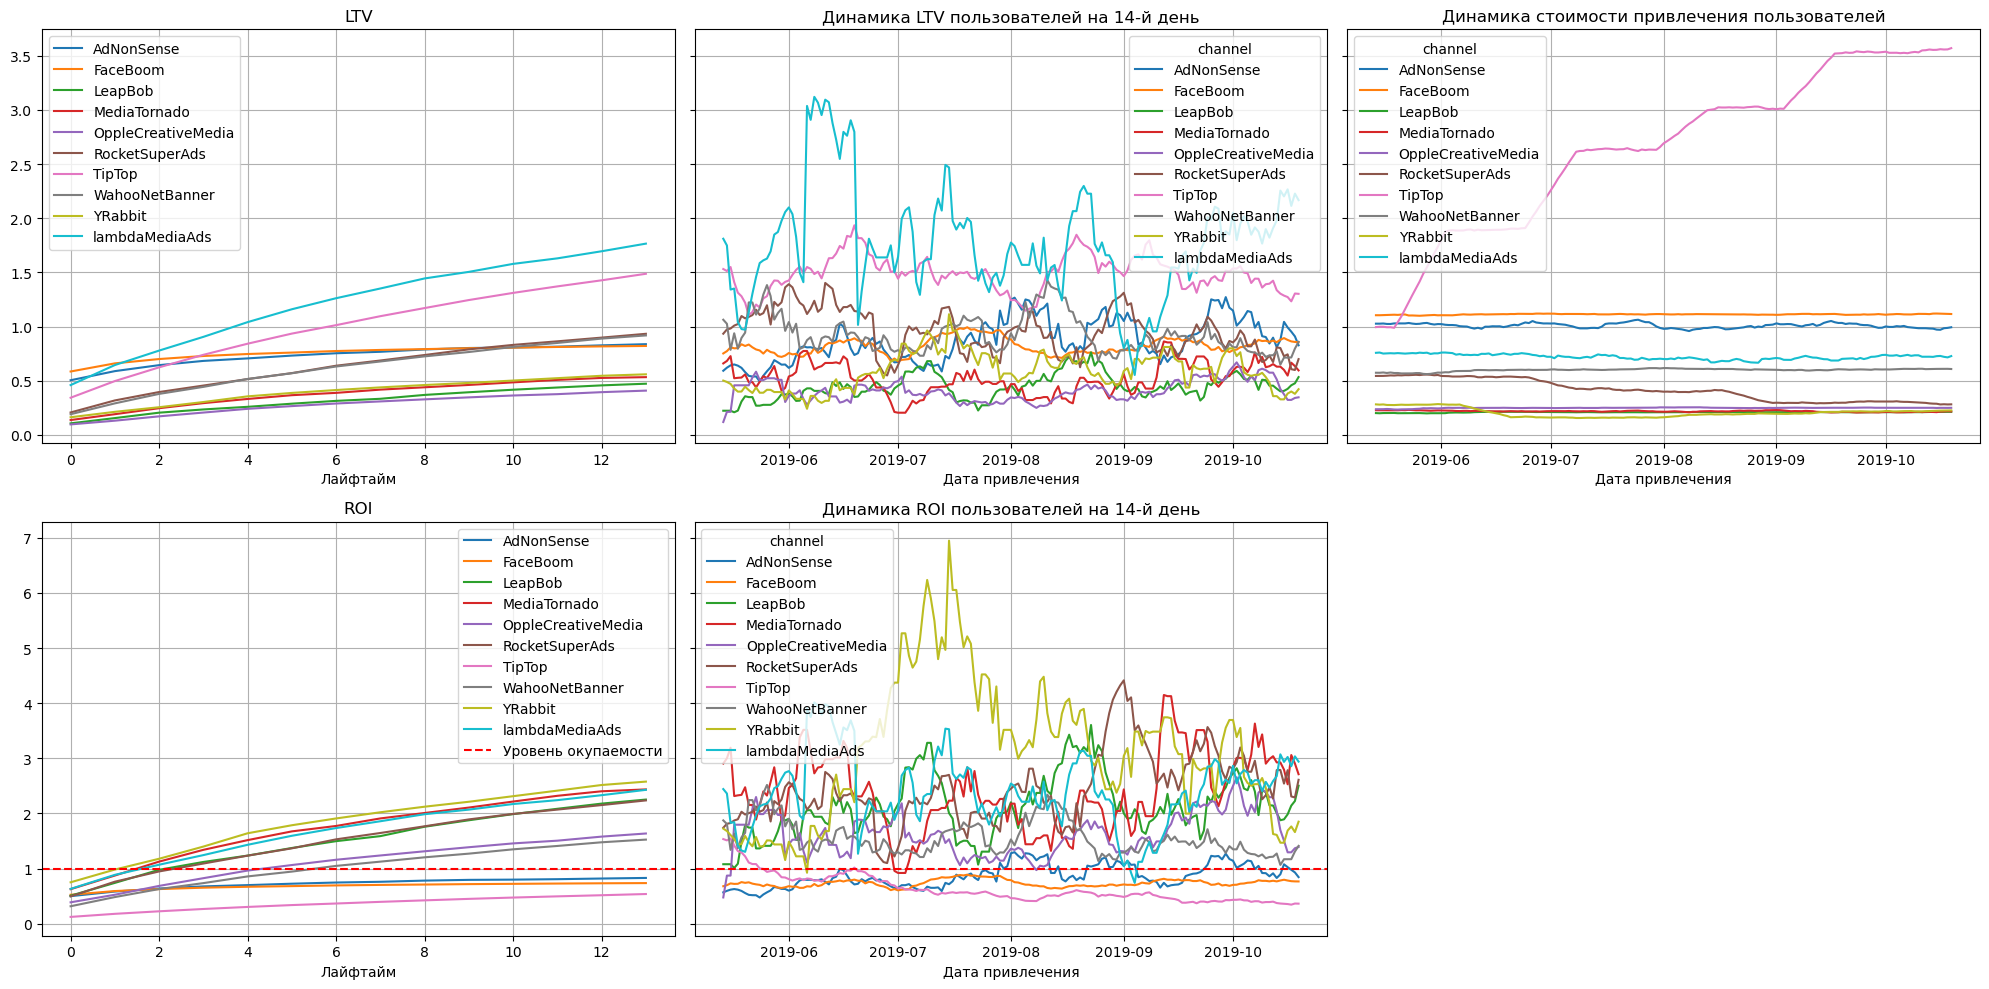

In [40]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Самые качественные пользователи приходя с каналов AdNonSense и TipTop. Согласно динамике на 14-й день наблюдается сезонность - окупаемость выше летом. 
<br>

Наибольшая стоимость привлечения пользователей у канала TopTop, причем наблюдается огромный разрыв в тратах на TipTop и другие каналы. Вместе с тем, окупаемость ниже 1 только у трех из десяти каналов - TipTop, AdNonSense и FaceBoom. Лучше всего окупаются пользователи с YRabbit. Таким образом отделу маркетинга не стоит тратить много денег на канал TipTop.

*Анализ конверсии и удержания по устройствам*

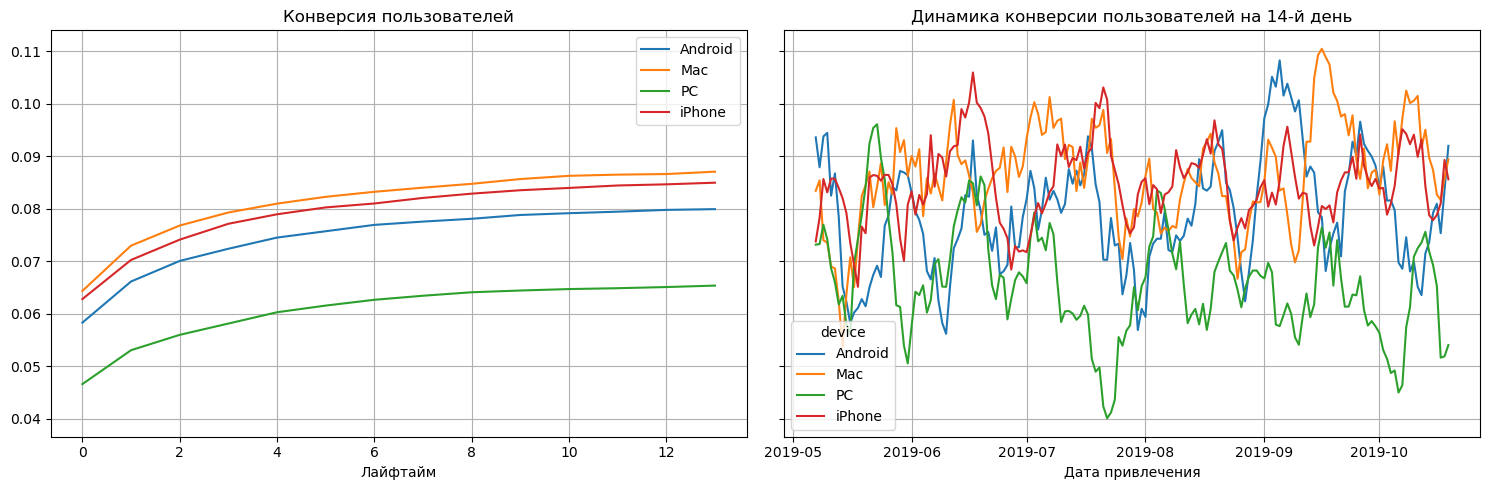

In [41]:
# рассчитаем конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

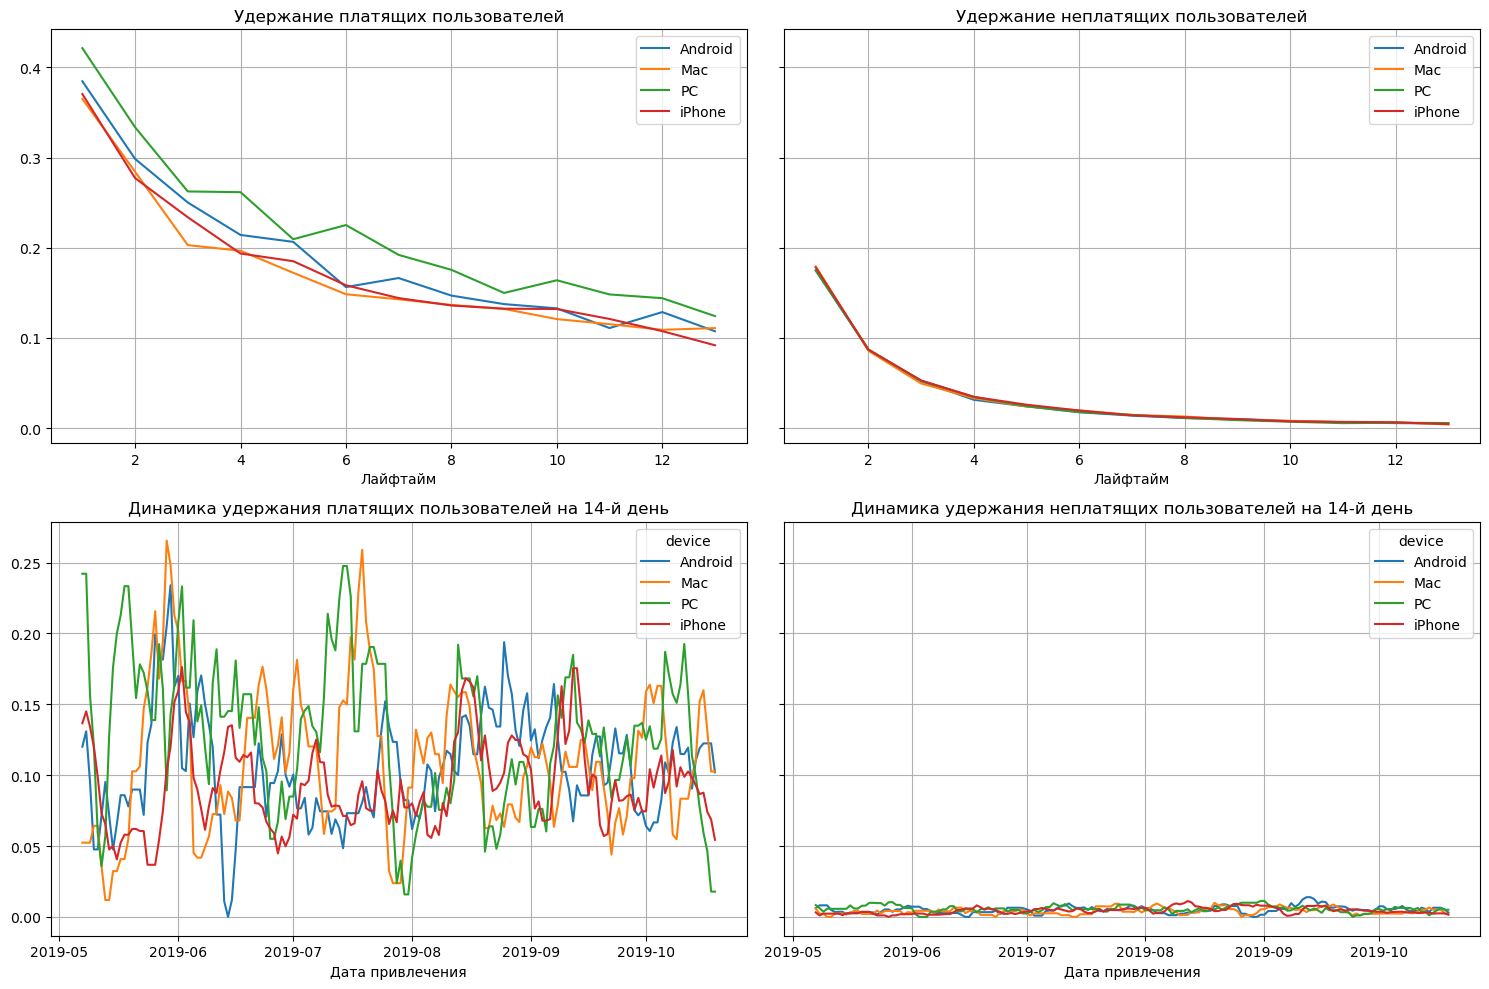

In [42]:
# рассчитаем удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Лучше всего и в целом стабильно конвертируются в клиентов пользователи Mac и Iphone (компания Apple), а меньше всего - PC. Однако по удержанию платящих наблюдается противоположная ситуация: удерживаются лучше всего пользователи PC, в меньшей степени - Mac и Iphone (примерно на 20% ниже). Удержание неплатящих не меняется в зависимости от устройства. Согласно динамике удержания на 14-й день, удержание сильно варьируется по месяцам, так, к примеру, в июне-июле у Mac было наибольшее удержание, а к августу удержание упало, как и у владельцев PC. Таким образом, в удержании играет большую роль сезонность.

*Анализ конверсии и удержания по странам*

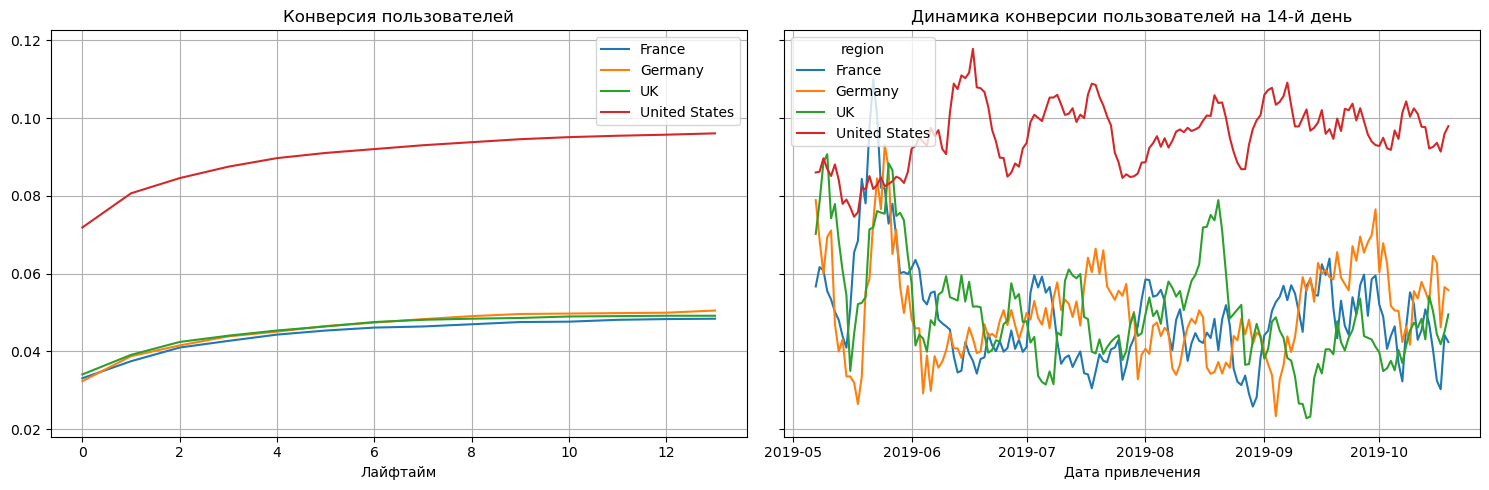

In [43]:
# рассчитаем конверсию с разбивкой по регионам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

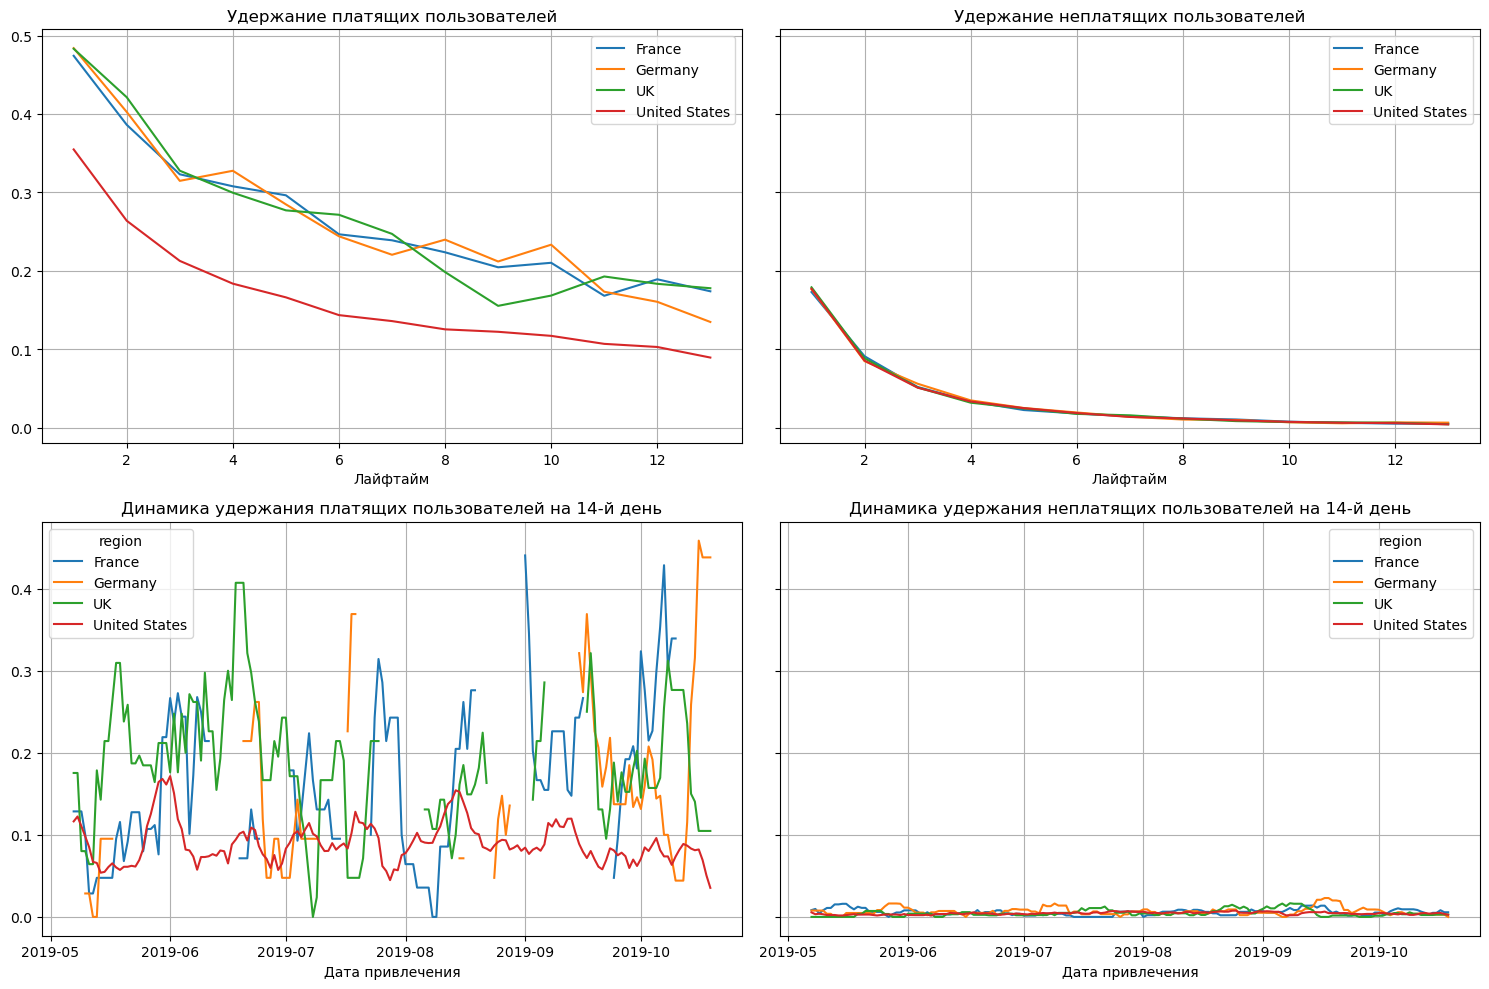

In [44]:
# рассчитаем удержание с разбивкой по регионам
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Значительно выше (порядка на 40%) конверсия у пользователей из США, у всех остальных странах примерно одинаковая конверсия. Интересно отметить, что на конец второй недели в мае была достаточно высокая конверсия у пользователей из Франции.
<br> Удержание платящих пользователей США напротив самое низкое, а у остальных стран примерно одинаковое, вместе с тем удержание снижается в зависимости от когорты (от более раннее, к более поздней). Согласно "рванным" линяим графика удержания на 14-й день мы видим, что пользователей из Франции и Германии не удерживались, что, вероятно, связано с отсутствием в эти периоды рекламы.

*Анализ конверсии и удержания по каналам*

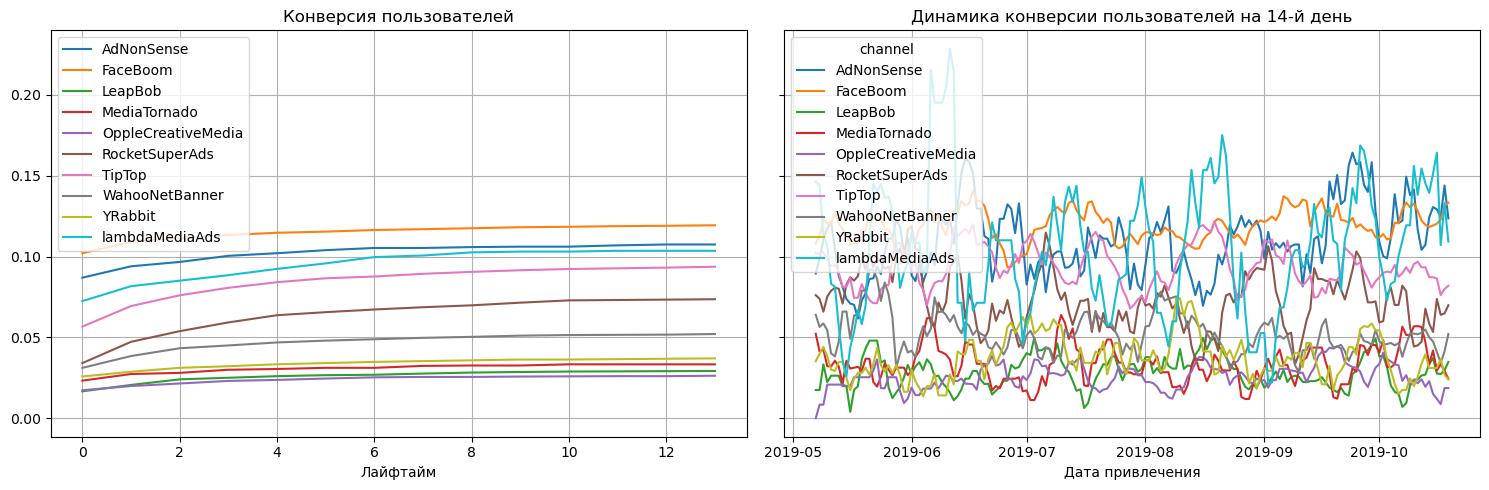

In [45]:
# рассчитаем конверсию с разбивкой по каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

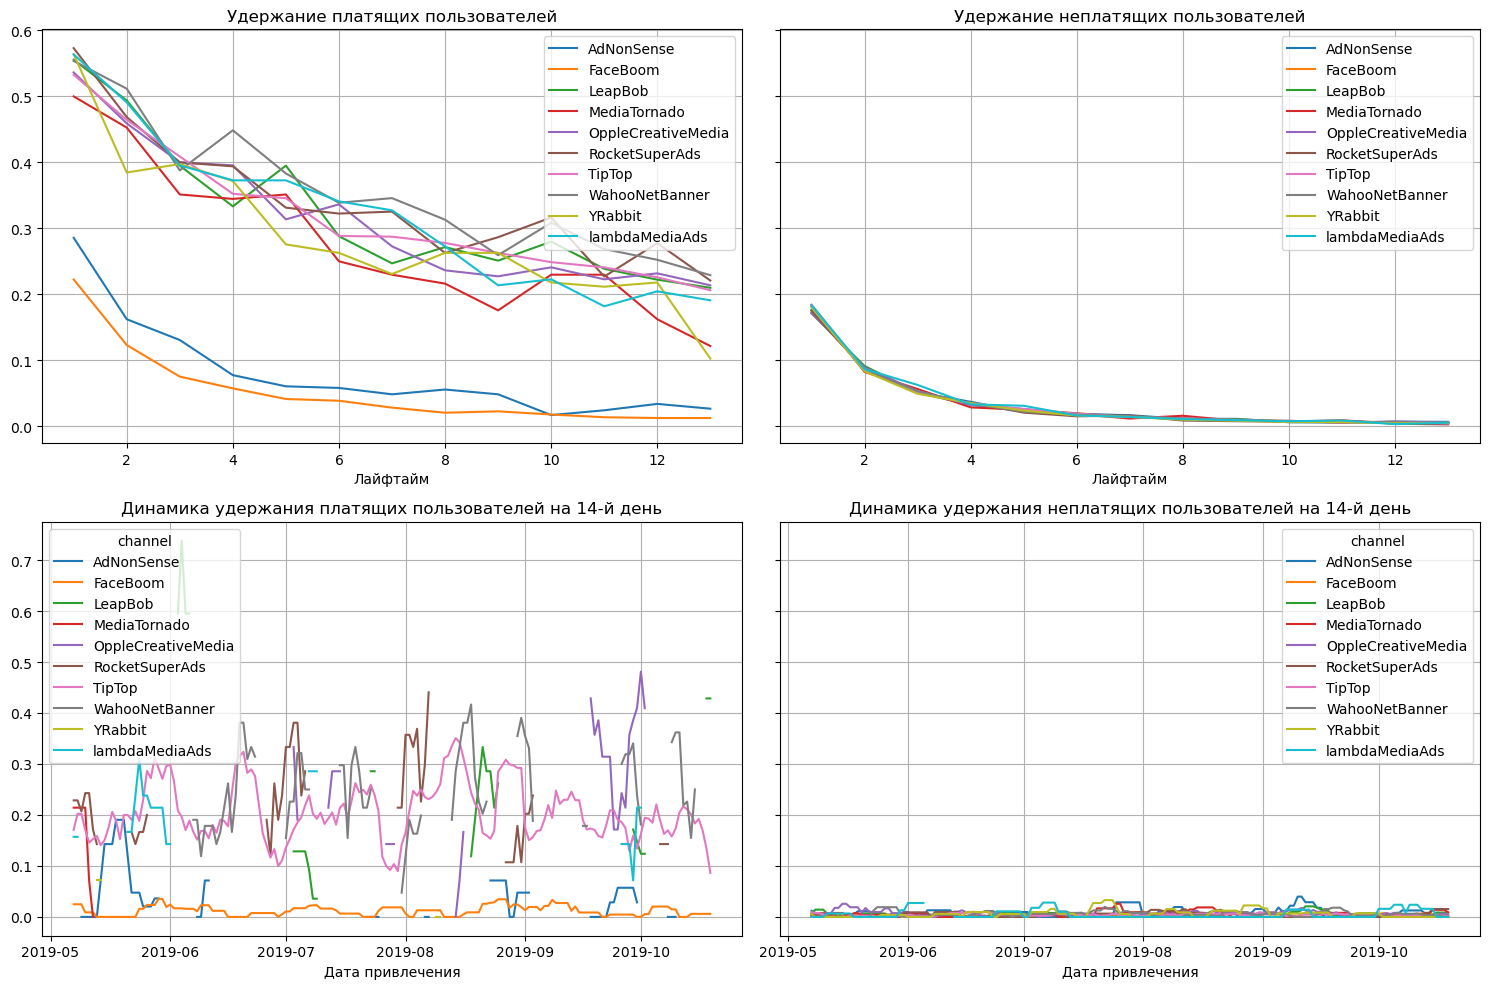

In [46]:
# рассчитаем удержание с разбивкой по каналам
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

У FaceBoom наблюдается самая высокая конверсия, также в тройку лидеров по конверсии входят AdNonSense и lambdaMediaAds. Однако удержание у FaceBoom и AdNonSense - самые низкие.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

## **Общие выводы** ##

Самое большое количество пользователей приходят из США (порядка 100 тыс., что значительно больше, чем в остальных странах), доля платящих также выше всего в США и составляет 7%, тогда как в Германии, Великобритании и Франции их доля равна около 4%. 
Наиболее затратными каналами являются TipTop и FaceBoom, в целом же расходы компании на рекламу постоянно растут.
<br>

Клиенты приложения предпочитают пользоваться Iphone, остальные типы устройств имеют примерно одинаковое количество пользователей. Окупаемость имеет сезонный характер, летом больше пользователей, в том числе конвертирующихся в клиентов.
<br>

По показателям конвертируемости лидируют пользователи из США и владельцы Iphone и Maс, вместе с тем у них самая низкое удержание, что, вероятно, связано с техническими проблемами.
<br>

Основная проблема компании (неокупаемость расходов), вероятно, связана со слишком большими расходами на те каналы, страны и устройства, которые имеют низкий ROI, то есть не окупаются должным образом. Вместе с тем, некоторые каналы и страны  время от времени не получают финансирования для рекламы. По этой причине можно порекомендовать отделу маркетинга снизить значительно расходы на привлечение пользователей из США, и также пользователей Iphone и Mac, и сократить рекламные затраты по каналу TipTop. Кроме того, следует имеющийся бюджет на рекламу распределить более равномерно по странам, устройствам и каналам, так как они даже при небольших рекламных затратах в большей степени окупаются. Можно предположить, что с ростом рекламы, увеличится и их окупаемость.
<br>

Также можно предложить больше рекламных расходов направить на альтернативные каналы, имеющие приемлемые показатели(конверсия, удержание, ROI). К ним можно отнести lambdaMediaAds, который несмотря на самое маленькое число, привлеченных пользователей, входят в лидеры по доле платящих пользователей, и имеет высокую конверсию и удержание, что говорит о высокой эффективности рекламы на данном канале.
